# Problem setting


## Africa Economic, Banking and Systemic Crisis :
Context : This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

## Content :
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. Acknowledgements Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country. [online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].

## Inspiration :

Which factors are most associated with Systemic Crises in Africa ?



# Dataset description :
## Input variables :

* systemic_crisis "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
* exch_usd The exchange rate of the country vis-a-vis the USD
* domestic_debt_in_default "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
* sovereign_external_debt_default "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
* gdp_weighted_default The total debt in default vis-a-vis the GDP
* inflation_annual_cpi The annual CPI Inflation rate
* independence "0" means "no independence" and "1" means "independence"
* currency_crises "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year
* inflation_crises "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year
## Predict variable (desired target):

banking_crisis "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

## Introduce the Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import data and take a look
data= pd.read_csv("african_crises.csv")
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
print(data.shape)

(1059, 14)


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


Our next step is to divide the train data into “attributes” and “labels”. X variable contains all the attributes/features and Y variable contains labels.


In [5]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = data.drop('banking_crisis', 1)
y = data.banking_crisis

In [6]:
X = X.drop('case', 1)
X = X.drop('cc3', 1)

In [7]:
print(X.shape)

(1059, 11)


## Exploring the data

Lets now explore the data with few visualizations.

In [8]:
# Take a look at the outcome variable: 'income'
print(data['banking_crisis'].value_counts())

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64


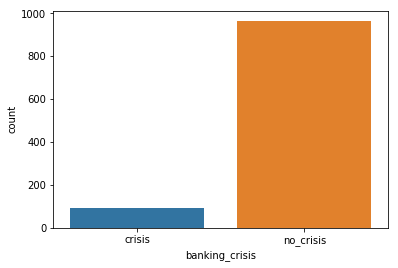

In [9]:
# Ploting the distribution of the labels in the bar plot
sns.countplot(x='banking_crisis', data=data);

Our classes are imbalanced

Text(0,0.5,'Frequency of banking crisis')

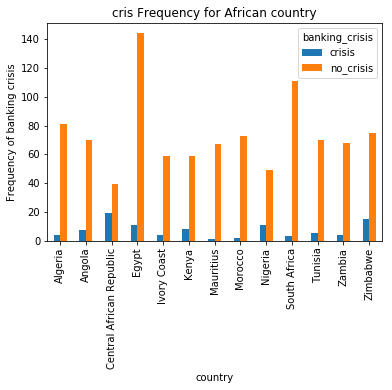

In [10]:
# Visualisations 

# cris by country 

pd.crosstab(data.country,y).plot(kind='bar')
plt.title('cris Frequency for African country')
plt.xlabel('country')
plt.ylabel('Frequency of banking crisis')

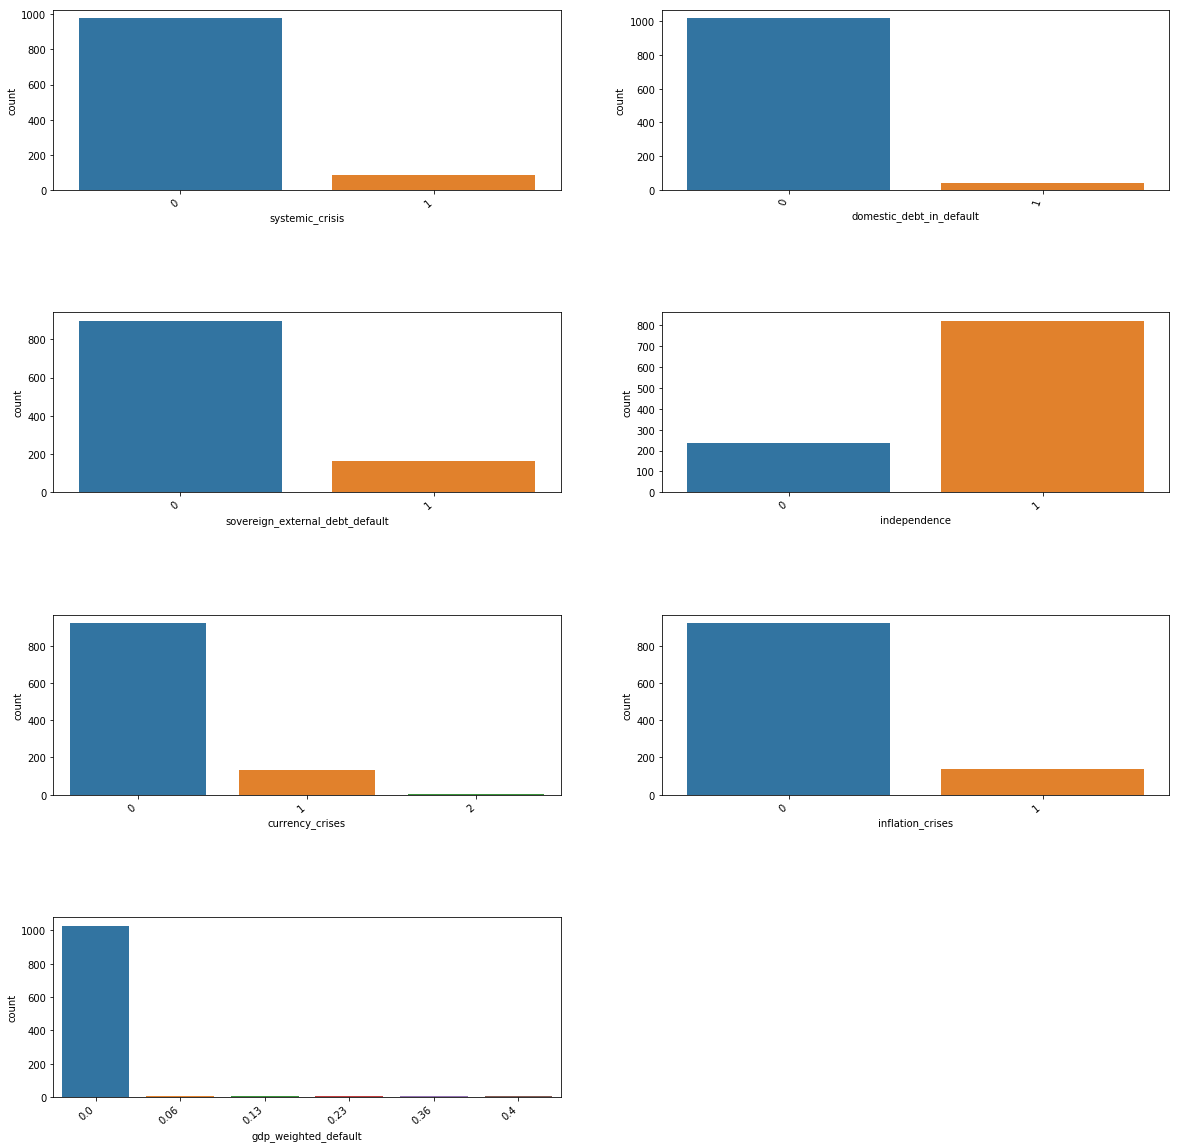

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])

# Employment type
wc_plot = sns.countplot(X['systemic_crisis'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Gender
ge_plot = sns.countplot(X['domestic_debt_in_default'], ax=axs[0][1])
ge_plot.set_xticklabels(ge_plot.get_xticklabels(), rotation=72, ha="right")

# Education level
ed_plot = sns.countplot(X['sovereign_external_debt_default'], ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(X['independence'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(X['currency_crises'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(X['inflation_crises'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(X['gdp_weighted_default'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

Text(0,0.5,'Frequency of banking crisis')

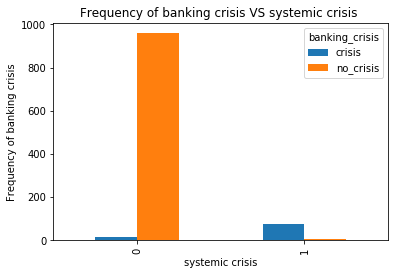

In [13]:
# visualisation for categorical variables

pd.crosstab(data.systemic_crisis,y).plot(kind='bar')
plt.title('Frequency of banking crisis VS systemic crisis ')
plt.xlabel('systemic crisis')
plt.ylabel('Frequency of banking crisis')

Text(0,0.5,'Frequency of banking crisis')

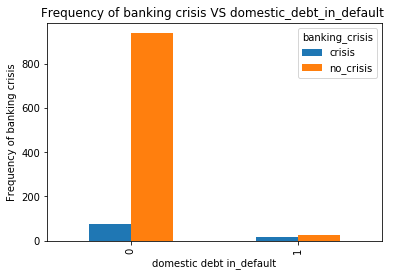

In [14]:
pd.crosstab(data.domestic_debt_in_default,y).plot(kind='bar')
plt.title('Frequency of banking crisis VS domestic_debt_in_default ')
plt.xlabel('domestic debt in_default')
plt.ylabel('Frequency of banking crisis')

Text(0,0.5,'Frequency of banking crisis')

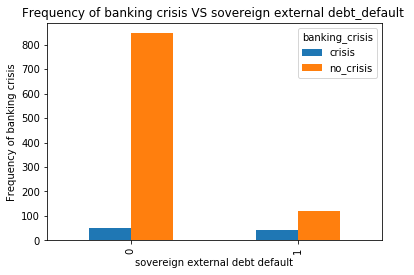

In [15]:
pd.crosstab(data.sovereign_external_debt_default,y).plot(kind='bar')
plt.title('Frequency of banking crisis VS sovereign external debt_default ')
plt.xlabel('sovereign external debt default')
plt.ylabel('Frequency of banking crisis')

Text(0,0.5,'Frequency of banking crisis')

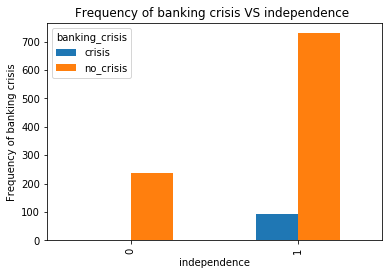

In [16]:
pd.crosstab(data.independence,y).plot(kind='bar')
plt.title('Frequency of banking crisis VS independence ')
plt.xlabel('independence')
plt.ylabel('Frequency of banking crisis')

Text(0,0.5,'Frequency of banking crisis')

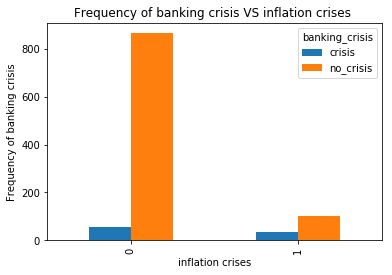

In [17]:
pd.crosstab(data.inflation_crises,y).plot(kind='bar')
plt.title('Frequency of banking crisis VS inflation crises ')
plt.xlabel('inflation crises')
plt.ylabel('Frequency of banking crisis')

Text(0,0.5,'Frequency')

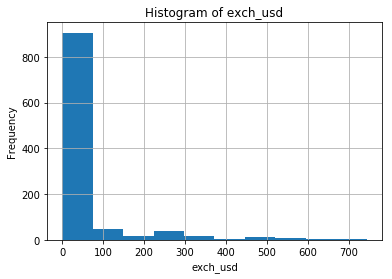

In [18]:
# numerical variables 

data.exch_usd.hist()
plt.title('Histogram of exch_usd')
plt.xlabel('exch_usd')
plt.ylabel('Frequency')

### Conclusion :
* Our result indicate that Systemic crises in Africa is significantly correleted with three factors :

    * systemic_crisis
    * exch_usd
    * independence

## Data cleaning

### Dealing with data types

Models can only handle numeric features
Must convert categorical and ordinal features into numeric features

In [19]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".
              format(col_name=col_name, unique_cat=unique_cat))

Feature 'country' has 13 unique categories


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in X.columns:
        if X[col_name].dtypes == 'object':
            X[col_name]=le.fit_transform(X[col_name])

In [23]:
# Our predict variable  is categorical we have to convert it to binary .
# Create dummy variables

y= pd.get_dummies(y)
y = y.drop(['no_crisis'], axis = 1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 11 columns):
country                            1059 non-null int64
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
dtypes: float64(3), int64(8)
memory usage: 91.1 KB


In [25]:
y['crisis'].value_counts()

0    965
1     94
Name: crisis, dtype: int64

### Handling missing data

An alternative solution is to use imputation
    - Replace missing value with another value
    - Strategies: mean, median, highest frequency value of given feature

In [26]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

# Confirm All Missing Data is Handled

inflation_crises        0
currency_crises         0
independence            0
inflation_annual_cpi    0
gdp_weighted_default    0
dtype: int64

In [27]:
# Impute missing values using Imputer in sklearn.preprocessing
#from sklearn.preprocessing import Imputer

#imp = Imputer(missing_values='NaN', strategy='median', axis=0)
#imp.fit(X)
#X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

##  Model building

### Build model using processed data

In [28]:
# Importing objects from sklearn to help with the predictions.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,
             precision_score, recall_score, confusion_matrix,
             precision_recall_curve

In [30]:
# Use train_test_split in sklearn.cross_validation
# to split data into train and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y['crisis'],
                                        train_size=0.70, random_state=1)

C:\Users\awdii\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
# Creating a confusion matrix.
def CMatrix(CM, labels=['No crisis','crisis']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['TOTAL'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [32]:
# Preparing a pandas DataFrame to analyze models (evaluation metrics).
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
            columns=['NULL','LogisticReg','ClassTree','RandomForest'])

## The Null Model : Always predict the most common category

In [33]:
#######################
# The Null Model.
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)
accuracy_score(y_pred=y_pred_test, y_true=y_test)

C:\Users\awdii\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9025157232704403

In [34]:
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,287,0,287
crisis,31,0,31
TOTAL,318,0,318


##  A. Logistic Regression.

In [35]:
# A. Logistic Regression.
# 1- Import the estimator object (model).
from sklearn.linear_model import LogisticRegression

# 2- Create an instance of the estimator.
logistic_regression = LogisticRegression()

# 3- Use the trainning data to train the estimator.
logistic_regression.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,287,0,287
crisis,29,2,31
TOTAL,316,2,318


## B. Classification Trees.

In [36]:
# B. Classification Trees.
# 1- Import the estimator object (model).
from sklearn.tree import DecisionTreeClassifier

# 2- Create an instance of the estimator.
class_tree = DecisionTreeClassifier(min_samples_split=30,
                            min_samples_leaf=10, random_state=10)

# 3- Use the trainning data to train the estimator.
class_tree.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,284,3,287
crisis,5,26,31
TOTAL,289,29,318


## C. Random Forest Classifier

In [37]:
# C. Random Forest Classifier.
# 1- Import the estimator object (model).
from sklearn.ensemble import RandomForestClassifier


# 2- Create an instance of the estimator.
random_forest = RandomForestClassifier()

# 3- Use the trainning data to train the estimator.
random_forest.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = random_forest.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,285,2,287
crisis,4,27,31
TOTAL,289,29,318


In [38]:
#######################
# Comparing the models with percentages.
100*metrics

,NULL,LogisticReg,ClassTree,RandomForest
accuracy,90.2516,90.8805,97.4843,98.1132
precision,0,100,89.6552,93.1034
recall,0,6.45161,83.871,87.0968


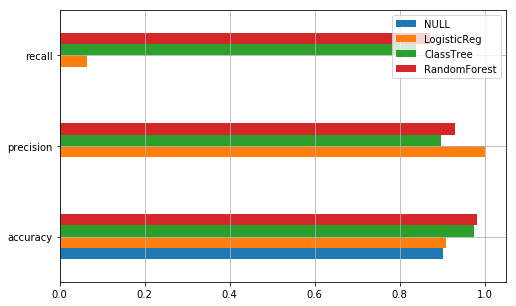

In [39]:
# Comparing the models with a bar graph.
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [40]:
# Adjusting the precision and recall values for the Descion Trees model.
precision_nb, recall_nb, thresholds_nb =
           precision_recall_curve(y_true=y_test,
           probas_pred=class_tree.predict_proba(X_test)[:,1])

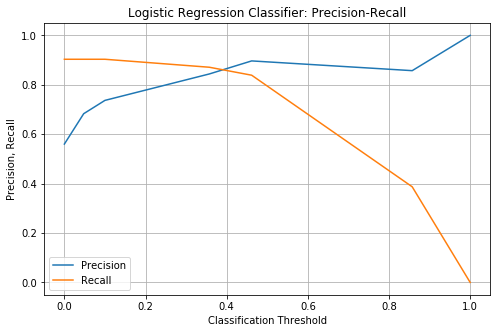

In [41]:
# Creating a confusion matrix for modified Descion Trees model.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_nb, precision_nb[1:], label='Precision')
ax.plot(thresholds_nb, recall_nb[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.legend()
ax.grid();

## Adjusting the threshold to 0.2.

In [42]:
# Adjusting the threshold to 0.2.
y_pred_proba = class_tree.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Recall: ', str(100*recall_score(y_pred=y_pred_test, y_true=y_test)) + '%')
print('Precision: ', str(100*precision_score(y_pred=y_pred_test, y_true=y_test)) + '%')
CMatrix(CM)

Recall:  90.32258064516128%
Precision:  73.68421052631578%


PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,277,10,287
crisis,3,28,31
TOTAL,280,38,318


In [43]:
# Adjusting the precision and recall values for the logistic regression model.
precision_lr, recall_lr, thresholds_lr = 
               precision_recall_curve(y_true=y_test, 
               probas_pred=logistic_regression.predict_proba(X_test)[:,1])


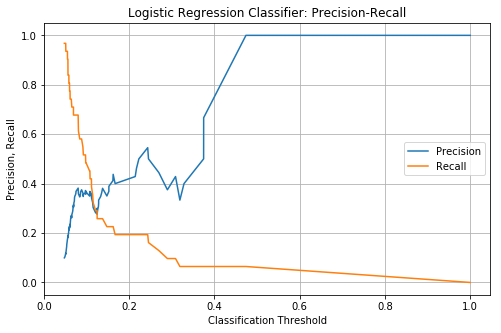

In [44]:
# Creating a confusion matrix for modified Logistic Regression Classifier.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.legend()
ax.grid();

## Adjusting the threshold to 0.07

In [45]:
# Adjusting the threshold to 0.07
y_pred_proba = logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.07).astype('int')

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Recall: ', str(100*recall_score(y_pred=y_pred_test, y_true=y_test)) + '%')
print('Precision: ', str(100*precision_score(y_pred=y_pred_test, y_true=y_test)) + '%')
CMatrix(CM)

Recall:  67.74193548387096%
Precision:  30.434782608695656%


PREDICTION,No crisis,crisis,Total
TRUE,,,
No crisis,239,48,287
crisis,10,21,31
TOTAL,249,69,318
